In [133]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split

In [134]:
#Loading of data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [135]:
#check if dataset has null or NAN values
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

Data Visualization

Text(0.5, 1.0, 'Histogram of Ages')

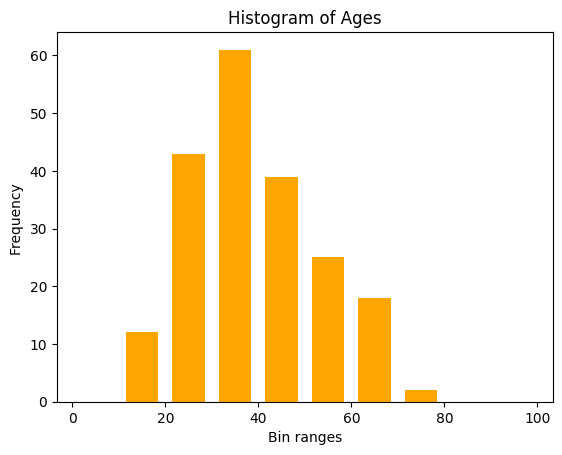

In [136]:
plt.hist(df['Age'],range=(0,100),rwidth=0.7,color=('orange'))
plt.xlabel('Bin ranges')
plt.ylabel('Frequency ')
plt.title('Histogram of Ages')

Text(0.5, 1.0, 'Bar chart')

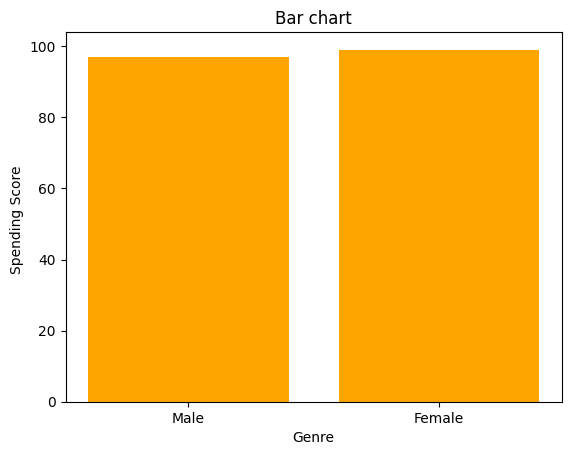

In [137]:
plt.bar(df['Genre'],df['Spending Score (1-100)'],color=('orange'))
plt.xlabel('Genre')
plt.ylabel('Spending Score ')
plt.title('Bar chart')

Text(0.5, 1.0, 'Histogram of Annual Income')

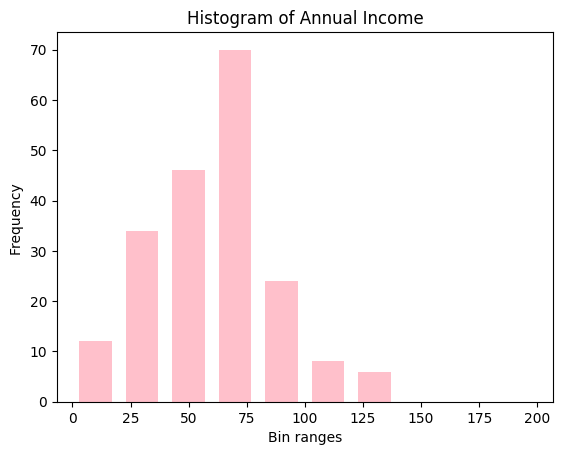

In [138]:
plt.hist(df['Annual Income (k$)'],range=(0,200),rwidth=0.7,color=('pink'))
plt.xlabel('Bin ranges')
plt.ylabel('Frequency ')
plt.title('Histogram of Annual Income')

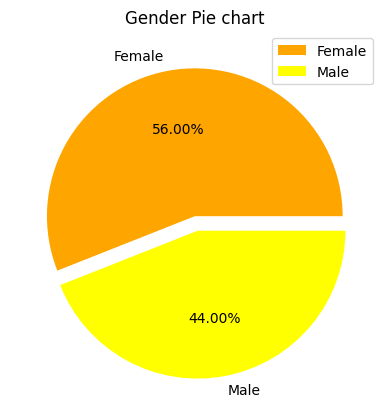

In [139]:
labels=['Female','Male']
colors=['Orange','Yellow']
explode=[0,0.1]
plt.title('Gender Pie chart')
plt.pie(df['Genre'].value_counts(),explode=explode,labels=labels,colors=colors,autopct='%0.2f%%')
plt.legend()
plt.show()

Data Pre-Processing part

In [140]:
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)
df.rename(columns = {'Genre_Male':'Gender'}, inplace = True)
df.rename(columns = {'Annual Income (k$)':'Annual Income'}, inplace = True)
df.rename(columns = {'Spending Score (1-100)':'Spending Score'}, inplace = True)

In [141]:
df.head()

,CustomerID,Age,Annual Income,Spending Score,Gender
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [142]:
df = df.drop(['CustomerID'], axis=1)
df = df.drop(['Annual Income'], axis=1)
df = df.drop(['Spending Score'], axis=1)
df.head()

,Age,Gender
0,19,1
1,21,1
2,20,0
3,23,0
4,31,0


In [143]:
X_train, X_test = train_test_split(df ,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

# Machine Learning Section

It has no labels so it is an unsupervised learning problem so K-Means is used

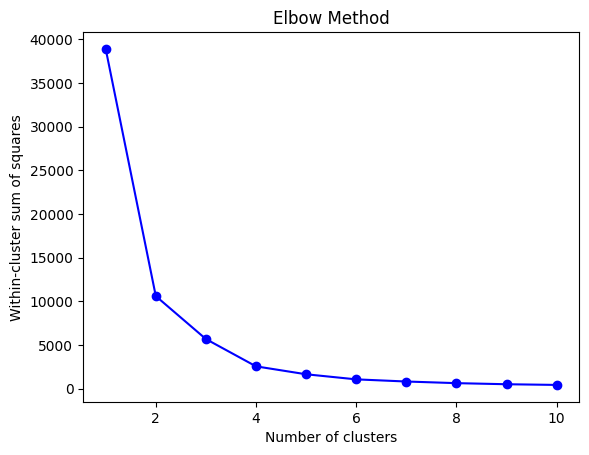

In [123]:
# Finding optimal Clusters using elbow-loss method
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 11), wss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method')
plt.show()

In [144]:
#It is observed that the number of optimal clusters is 5 so 5 is used and is tested.
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(X_test)

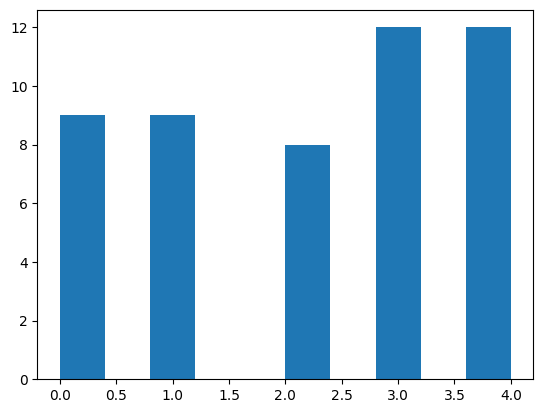

In [147]:
# The value distribution is shown.
plt.hist(labels)
plt.show()